<a href="https://colab.research.google.com/github/codedraco/DS-Training-Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Import Pandas Library and numpy library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/GLA/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


finding correlation between attributes

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Accesing the dataframe through iloc 

In [ ]:
df.iloc[:,0:3]

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


## Heat Map For Correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

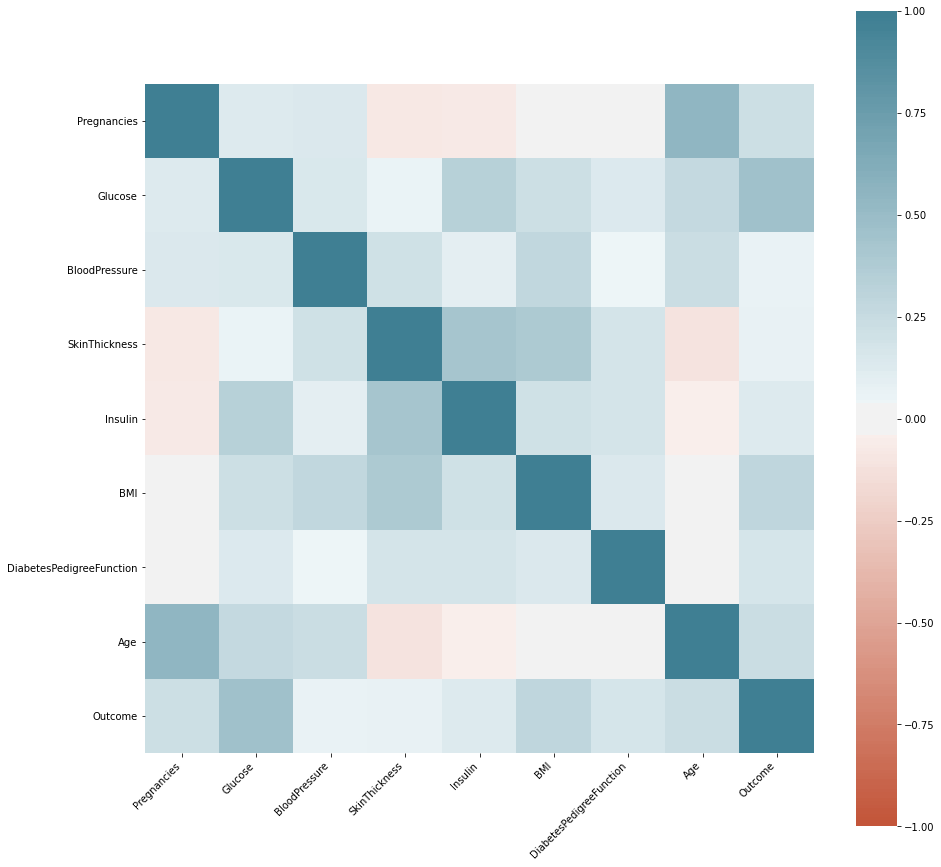

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

## Checking the null value if any null value is present

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
median_df = df.median()
median_df

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Quartiles to check Outliers 

In [ ]:
Q1 = df['Glucose'].quantile(0.25)
Q2 = df['Glucose'].quantile(0.50)
Q3 = df['Glucose'].quantile(0.75)
Q4 = df['Glucose'].quantile(1)
print(Q1)
print(Q2)
print(Q3)
print(Q4)

99.0
117.0
140.25
199.0


From this observation we can see that entries in the fourth Quartile are Outliers

In [ ]:
X = df.iloc[:,0:7].values
y = df.iloc[:, 8].values


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting the model and predicting model

In [ ]:
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
#classifier = SVC(kernel ='linear', random_state = 13)
#classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state=13)
#classifier = GradientBoostingClassifier(random_state=13)
classifier = LogisticRegression(random_state=13)
#classifier = MLPClassifier(random_state=13)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.8020833333333334

In [ ]:
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


In [ ]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[117,  13],
       [ 25,  37]])

## Finding accuracy score

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities = classifier.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.8705955334987594

## Precision means the percentage of your results which are relevant.

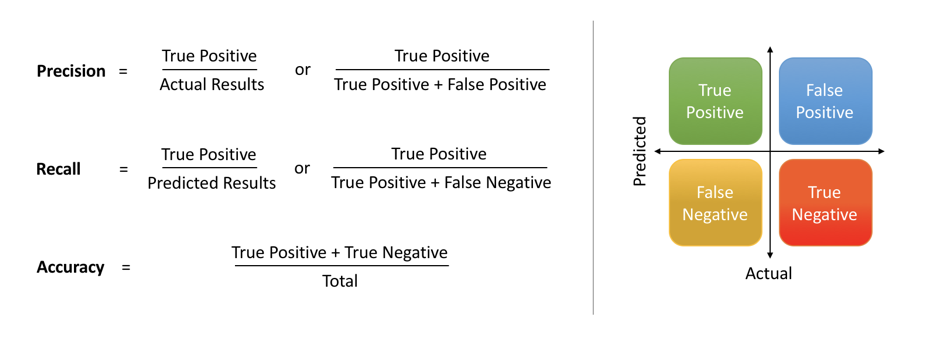

In [ ]:
from sklearn.metrics import precision_score

train_predictions = classifier.predict(X_train)
precision_score(y_train, train_predictions)

0.7278481012658228

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_train, train_predictions)

0.558252427184466

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8020833333333334

## Visualising the prediction using Scatter plot

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_train, y_train
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1,stop=X_set[:, 0].max()+1, step = 0.01),
np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1,step =0.01))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


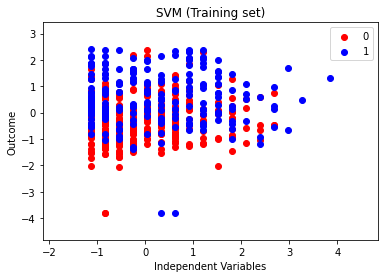

In [ ]:
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=
  ListedColormap(('red','blue'))(i) ,label= j)
plt.title('SVM (Training set)')
plt.xlabel('Independent Variables')
plt.ylabel('Outcome')
plt.legend() 
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_test, y_test
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1,stop=X_set[:, 0].max()+1, step = 0.01),
np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1,step =0.01))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


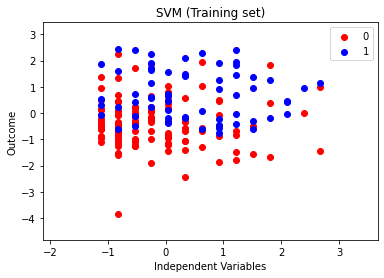

In [ ]:
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=
  ListedColormap(('red','blue'))(i) ,label= j)
plt.title('SVM (Training set)')
plt.xlabel('Independent Variables')
plt.ylabel('Outcome')
plt.legend() 
plt.show()